<a href="https://colab.research.google.com/github/nishamathi/MachineLearningJourney/blob/main/MLJdphiDatathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install imblearn

In [65]:
!pip install six

In [66]:
pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: imbalanced-learn
Required-by: 


In [67]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy, joblib
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [68]:
import pandas as pd
import numpy as np
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [69]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [70]:
#%%# To find dtypes of all columns
#print(insurance_data.dtypes)

print('-------------------------------- Rows*Columns in the data ---------------------')
print(insurance_data.shape)
print('-------------------------------- Info on the data ---------------------')

print(insurance_data.info())
print('-------------------------------- Basic Description of numeric data ---------------------')

print(insurance_data.describe())

-------------------------------- Rows*Columns in the data ---------------------
(48260, 11)
-------------------------------- Info on the data ---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB
No

In [71]:
# Check missing values
print('-------------------------------- NULL values in the data ---------------------')
print(insurance_data.isnull().sum())

print('-------------------------------- Negative values in the numeric data ---------------------')
# Check if negative values are present in int and float dtypes
bool=insurance_data['Age']<0
print('Age Neg value',bool.sum())

bool=insurance_data['Claim']<0
print('Claim Neg value',bool.sum())

bool=insurance_data['Duration']<0
print('Duration Neg value',bool.sum())

bool=insurance_data['Net Sales']<0
print('Net Sales Neg value',bool.sum())

bool=insurance_data['Commision (in value)']<0
print('Commision in value Neg value',bool.sum())

print('-------------------------------- Gender variable distribution in the data ---------------------')
gen=insurance_data['Gender'].value_counts()
print(gen)

print('-------------------------------- Duration variable basic measures in the data ---------------------')
print('Mean of duration', np.mean(insurance_data['Duration']))
print('Median of duration', np.median(insurance_data['Duration']))
print('Min of duration', np.min(insurance_data['Duration']))
print('Max of duration', np.max(insurance_data['Duration']))

-------------------------------- NULL values in the data ---------------------
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64
-------------------------------- Negative values in the numeric data ---------------------
Age Neg value 0
Claim Neg value 0
Duration Neg value 3
Net Sales Neg value 522
Commision in value Neg value 0
-------------------------------- Gender variable distribution in the data ---------------------
M    7137
F    6762
Name: Gender, dtype: int64
-------------------------------- Duration variable basic measures in the data ---------------------
Mean of duration 49.5466017405719
Median of duration 22.0
Min of duration -2
Max of duration 4881


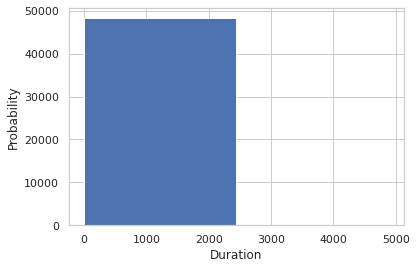

In [72]:
# brief Visualization to get idea of distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(insurance_data['Duration'], density=False, bins=2)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Duration');


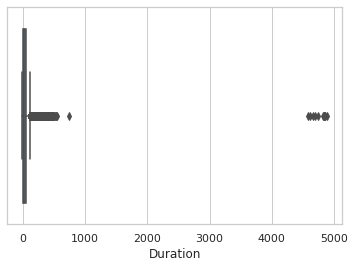

In [73]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=insurance_data["Duration"])

#EDA Summary
1. Column of duration : contains negative values unsure what this means, could be the person didnt take the trip as planned? Max value of duration is 4881, units could be in days considering the destination values. The box plot says those could actually be outliers too.
2. Column of gender : Too many blank values (34,361 rows, 71% of the data is missing)
3. Column of age: Max age of 118. Current oldest living person is 114-year old
4. Column of Destination: Too many levels (141 levels). So I decided to use TE instead of OHE for all categorical variables.

In [74]:
insurance_data['Gender']=insurance_data['Gender'].replace(np.nan,'Not Specified')

In [75]:
insurance_data.head(23)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.80,11.88,Not Specified,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.00,0.00,Not Specified,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.00,0.00,Not Specified,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.50,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.00,0.00,Not Specified,23,0
5,EPX,Travel Agency,Online,2 way Comprehensive Plan,36,"KOREA, REPUBLIC OF",47.00,0.00,Not Specified,36,0
6,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,THAILAND,25.00,0.00,Not Specified,36,0
7,EPX,Travel Agency,Online,Cancellation Plan,4,VIET NAM,27.00,0.00,Not Specified,35,0
8,EPX,Travel Agency,Online,2 way Comprehensive Plan,95,THAILAND,20.00,0.00,Not Specified,36,0
9,EPX,Travel Agency,Online,Cancellation Plan,30,AUSTRALIA,10.00,0.00,Not Specified,36,0


In [76]:
print(insurance_data.dtypes)
ag=pd.get_dummies(insurance_data['Agency'], prefix='AG')
ag.head()
pn=pd.get_dummies(insurance_data['Product Name'], prefix='PN')
pn.head()
gn=pd.get_dummies(insurance_data['Gender'], prefix='GN')
gn.head()
agtp=pd.get_dummies(insurance_data['Agency Type'], prefix='AGTP')
agtp.head()
dc=pd.get_dummies(insurance_data['Distribution Channel'], prefix='DC')
dc.head()
dest=pd.get_dummies(insurance_data['Destination'], prefix='Dest')
dest.head()
print(ag.shape)
print(pn.shape)
print(gn.shape)
print(agtp.shape)
print(dc.shape)
print(dest.shape)

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object
(48260, 16)
(48260, 26)
(48260, 3)
(48260, 2)
(48260, 2)
(48260, 141)


In [77]:
class TargetEncoder():
    def __init__(self):
        self.category_maps = {}
        return

    def keys(self):
        return self.category_maps.keys()

    def fit(self, X, y, keys):
        if type(keys) != list:
            keys = [keys]

        for key in keys:
            print("Fitting column {}".format(key))
            category_map = {}
            for category, group in X.groupby(key, as_index=False):
                category_map[category] = y.loc[y.index.isin(group.index)].mean()
            category_map[''] = y.mean()
            self.category_maps[key] = category_map

    def transform(self, X):
        retX = X.copy()
        for key in retX.keys():
            if key in self.category_maps:
                retX[key] = retX[key].map(lambda x: self.category_maps[key][x] if x in self.category_maps[key] else self.category_maps[key][''])
        
        return retX

In [43]:
# Code not used Tried OHE and TE initially
print(isinstance(gn, pd.DataFrame))
filt_id=insurance_data.drop(columns=['Agency','Product Name', 'Gender', 'Agency Type', 'Distribution Channel'])
tmp=[ag, gn, pn, agtp, dc, filt_id]
CatFile=pd.concat(tmp,axis=1) 
CatFile.columns
CatFile.head(5)

True


,AG_ADM,AG_ART,AG_C2B,AG_CBH,AG_CCR,AG_CSR,AG_CWT,AG_EPX,AG_JWT,AG_JZI,AG_KML,AG_LWC,AG_RAB,AG_SSI,AG_TST,AG_TTW,GN_F,GN_M,GN_Not Specified,PN_1 way Comprehensive Plan,PN_2 way Comprehensive Plan,PN_24 Protect,PN_Annual Gold Plan,PN_Annual Silver Plan,PN_Annual Travel Protect Gold,PN_Annual Travel Protect Platinum,PN_Annual Travel Protect Silver,PN_Basic Plan,PN_Bronze Plan,PN_Cancellation Plan,PN_Child Comprehensive Plan,PN_Comprehensive Plan,PN_Gold Plan,PN_Individual Comprehensive Plan,PN_Premier Plan,PN_Rental Vehicle Excess Insurance,PN_Silver Plan,PN_Single Trip Travel Protect Gold,PN_Single Trip Travel Protect Platinum,PN_Single Trip Travel Protect Silver,PN_Spouse or Parents Comprehensive Plan,PN_Ticket Protector,PN_Travel Cruise Protect,PN_Travel Cruise Protect Family,PN_Value Plan,AGTP_Airlines,AGTP_Travel Agency,DC_Offline,DC_Online,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,61,UNITED KINGDOM,19.8,11.88,29,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,93,NEW ZEALAND,63.0,0.00,36,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,22,UNITED STATES,22.0,0.00,25,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,14,SINGAPORE,54.5,13.63,24,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,90,VIET NAM,10.0,0.00,23,0


In [78]:
X=insurance_data.drop(columns=['Claim'])
y=insurance_data['Claim']
encoder=TargetEncoder()
encoder.fit(X,y,['Agency','Product Name', 'Gender', 'Agency Type', 'Distribution Channel','Destination'])

Fitting column Agency
Fitting column Product Name
Fitting column Gender
Fitting column Agency Type
Fitting column Distribution Channel
Fitting column Destination


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)
X_train=encoder.transform(X_train)
X_test=encoder.transform(X_test)

In [82]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   
X_trainSM, y_trainSM = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [83]:
print(X.shape)
if isinstance(X, pd.DataFrame):
  print('Yes X is dataframe')

(48260, 10)
Yes X is dataframe


In [84]:
print(X_trainSM.shape)
y_trainSM.sum()
if isinstance(X_trainSM, pd.DataFrame):
  print('Yes X_trainSM is dataframe')
else:
  print('No X_trainSM Not a dataframe')

(66538, 10)
No X_trainSM Not a dataframe


In [85]:
print(X_train.shape)
y_train.sum()

(33782, 10)


513

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf1=LogisticRegression().fit(X_trainSM,y_trainSM)
clf2=LogisticRegression(penalty='l2',C=0.001).fit(X_trainSM,y_trainSM)

In [88]:
acc1=clf1.score(X_trainSM,y_trainSM)
acc1tst=clf1.score(X_test,y_test)
predtrn=clf1.predict(X_trainSM)
predtst=clf1.predict(X_test)


acc2=clf2.score(X_trainSM,y_trainSM)
acc2tst=clf2.score(X_test,y_test)
predtrn2=clf2.predict(X_trainSM)
predtst2=clf2.predict(X_test)


print('1 Trg acc', acc1)
print('1 Tst acc', acc1tst)
print('1 LR Train')
print(classification_report(y_trainSM,predtrn))
print('1 LR Test')
print(classification_report(y_test,predtst))

print('2 Trg acc', acc2)
print('2 Tst acc', acc2tst)
print('2 LR Train')
print(classification_report(y_trainSM,predtrn2))
print('2 LR Test')
print(classification_report(y_test,predtst2))

1 Trg acc 0.7632029817547867
1 Tst acc 0.8586130681033292
1 LR Train
              precision    recall  f1-score   support

           0       0.72      0.86      0.78     33269
           1       0.83      0.67      0.74     33269

    accuracy                           0.76     66538
   macro avg       0.77      0.76      0.76     66538
weighted avg       0.77      0.76      0.76     66538

1 LR Test
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     14283
           1       0.06      0.63      0.11       195

    accuracy                           0.86     14478
   macro avg       0.53      0.74      0.51     14478
weighted avg       0.98      0.86      0.91     14478

2 Trg acc 0.6506507559590009
2 Tst acc 0.8088824423262881
2 LR Train
              precision    recall  f1-score   support

           0       0.61      0.81      0.70     33269
           1       0.72      0.49      0.58     33269

    accuracy                      

In [102]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(random_state=1) 

In [103]:
# fit the model on train data
dt.fit(X_trainSM, y_trainSM)
predictions_train = dt.predict(X_trainSM)
#Predictions on the Test data
predictions_test = dt.predict(X_test)
print('Train Accuracy ',accuracy_score(y_trainSM,predictions_train))
print('Test Accuracy ',accuracy_score(y_test,predictions_test))

Train Accuracy  0.999308665724849
Test Accuracy  0.9634618041165907


In [104]:
print('DT Train')
print(classification_report(y_trainSM,predictions_train))
print('DT Test')
print(classification_report(y_test,predictions_test))

DT Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33269
           1       1.00      1.00      1.00     33269

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

DT Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14283
           1       0.07      0.13      0.09       195

    accuracy                           0.96     14478
   macro avg       0.53      0.55      0.53     14478
weighted avg       0.98      0.96      0.97     14478



In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_trainSM, y_trainSM)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [108]:
rfc_pred_train=rfc.predict(X_trainSM)
rfc_pred_test=rfc.predict(X_test)

In [109]:
print('RFC Train')
print(classification_report(y_trainSM,rfc_pred_train))
print('RFC Test')
print(classification_report(y_test,rfc_pred_test))

RFC Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33269
           1       1.00      1.00      1.00     33269

    accuracy                           1.00     66538
   macro avg       1.00      1.00      1.00     66538
weighted avg       1.00      1.00      1.00     66538

RFC Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14283
           1       0.09      0.08      0.09       195

    accuracy                           0.98     14478
   macro avg       0.54      0.54      0.54     14478
weighted avg       0.98      0.98      0.98     14478



In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],
'max_depth': [10, 20],
'min_samples_leaf': [3, 4],
'min_samples_split': [4, 6],
'n_estimators': [100, 200]}

grid_search_1=GridSearchCV(RandomForestClassifier(random_state=1), parameters,cv=3, n_jobs = -1,verbose = 2,refit=True).fit(X_trainSM,y_trainSM)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.7min finished


In [112]:
gscv_rfc_test_pred=grid_search_1.predict(X_test)
gscv_rfc_trn_pred=grid_search_1.predict(X_trainSM)
print("Best parameters from GSCV", grid_search_1.best_params_)
print('GSCV RFC Train')
print(classification_report(y_trainSM,gscv_rfc_trn_pred))
print('GSCV RFC Test')
print(classification_report(y_test,gscv_rfc_test_pred))

Best parameters from GSCV {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
GSCV RFC Train
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33269
           1       0.99      0.99      0.99     33269

    accuracy                           0.99     66538
   macro avg       0.99      0.99      0.99     66538
weighted avg       0.99      0.99      0.99     66538

GSCV RFC Test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14283
           1       0.08      0.12      0.09       195

    accuracy                           0.97     14478
   macro avg       0.53      0.55      0.54     14478
weighted avg       0.98      0.97      0.97     14478



In [113]:
import time
start_time = time.time()
param_grid={"max_leaf_nodes": [5, 10, 15, 20],
              'min_samples_split': [4, 6, 8, 10]}
grid_search_2= GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=3,n_jobs = -1,verbose = 2,refit=True)
grid_search_2.fit(X_trainSM,y_trainSM)
print("GridSearch took %s seconds" % (time.time() - start_time))#Time to perform gridsearchCV
print("Best parameters from GSCV", grid_search_2.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.3s finished


GridSearch took 4.568226337432861 seconds
Best parameters from GSCV {'max_leaf_nodes': 20, 'min_samples_split': 4}


In [114]:
result = grid_search_2.cv_results_
#print(result)
gscv_dt_test_pred=grid_search_2.predict(X_test)
gscv_dt_trn_pred=grid_search_2.predict(X_trainSM)
print("Best parameters from GSCV", grid_search_2.best_params_)
print('GSCV DT Train')
print(classification_report(y_trainSM,gscv_dt_trn_pred))
print('GSCV DT Test')
print(classification_report(y_test,gscv_dt_test_pred))

Best parameters from GSCV {'max_leaf_nodes': 20, 'min_samples_split': 4}
GSCV DT Train
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     33269
           1       0.80      0.91      0.85     33269

    accuracy                           0.84     66538
   macro avg       0.84      0.84      0.84     66538
weighted avg       0.84      0.84      0.84     66538

GSCV DT Test
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     14283
           1       0.04      0.76      0.08       195

    accuracy                           0.77     14478
   macro avg       0.52      0.77      0.48     14478
weighted avg       0.98      0.77      0.86     14478



In [126]:
from sklearn.feature_selection import RFE
estimator=RandomForestClassifier(random_state=1)
selector = RFE(estimator, step=1)
selector = selector.fit(X_trainSM, y_trainSM)
selector.support_

estimator2=LogisticRegression(random_state=1)
selector2 = RFE(estimator2, step=1)
selector2 = selector2.fit(X_trainSM, y_trainSM)
selector2.support_

array([ True,  True, False,  True, False,  True, False, False,  True,
       False])

In [127]:
print('Features selected : ', selector.support_.sum())

Features selected :  5


In [128]:
print('Features selected : ', selector2.support_.sum())

Features selected :  5


In [129]:
print("Top features are ")

for i in X.columns[selector.support_]: print(i)
rfe_5=[]

for i in X.columns[selector.support_]:
  rfe_5.append(X.columns.get_loc(i))

Top features are 
Agency
Product Name
Duration
Destination
Net Sales


In [130]:
print("Top features are ")

for i in X.columns[selector2.support_]: print(i)
rfe_5=[]

for i in X.columns[selector2.support_]:
  rfe_5.append(X.columns.get_loc(i))

Top features are 
Agency
Agency Type
Product Name
Destination
Gender


In [131]:
print(rfe_5)
selector.ranking_

[0, 1, 3, 5, 8]


array([1, 5, 6, 1, 1, 1, 1, 4, 2, 3])

In [132]:
print('RFC RFE Train')
print(classification_report(y_trainSM,selector.predict(X_trainSM)))
print('RFC RFE Test')
print(classification_report(y_test,selector.predict(X_test)))

RFC RFE Train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     33269
           1       0.99      1.00      0.99     33269

    accuracy                           0.99     66538
   macro avg       0.99      0.99      0.99     66538
weighted avg       0.99      0.99      0.99     66538

RFC RFE Test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14283
           1       0.09      0.15      0.11       195

    accuracy                           0.97     14478
   macro avg       0.54      0.57      0.55     14478
weighted avg       0.98      0.97      0.97     14478



In [133]:
print('LR RFE Train')
print(classification_report(y_trainSM,selector2.predict(X_trainSM)))
print('LR RFE Test')
print(classification_report(y_test,selector2.predict(X_test)))

LR RFE Train
              precision    recall  f1-score   support

           0       0.72      0.87      0.78     33269
           1       0.83      0.66      0.73     33269

    accuracy                           0.76     66538
   macro avg       0.77      0.76      0.76     66538
weighted avg       0.77      0.76      0.76     66538

LR RFE Test
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14283
           1       0.06      0.62      0.11       195

    accuracy                           0.86     14478
   macro avg       0.53      0.74      0.52     14478
weighted avg       0.98      0.86      0.91     14478



In [120]:
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [121]:
# Take a look at the test data
test_data.head()
My_test=encoder.transform(test_data)
print(My_test.shape)
My_test.head()

(15832, 10)


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,0.005803,0.007418,0.014631,0.002605,24,0.005464,27.0,0.0,0.014671,36
1,0.005803,0.007418,0.014631,0.002605,51,0.006884,45.0,0.0,0.014671,36
2,0.005803,0.007418,0.014631,0.002605,52,0.006884,21.0,0.0,0.014671,21
3,0.005803,0.007418,0.014631,0.002605,89,0.042312,11.0,0.0,0.014671,30
4,0.005803,0.007418,0.014631,0.002605,5,0.003795,10.0,0.0,0.014671,33


In [93]:
#LR Results
My_test_LR1_pred=clf1.predict(My_test)
My_test_LR2_pred=clf2.predict(My_test)
My_test_LR1_pred

2374

In [99]:
print('------------------------- LR 1 Pred ----------------------------')
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_LR1_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
print('------------------------- LR 2 Pred ----------------------------')
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_LR2_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')


------------------------- LR 2 Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
print('------------------------- DT Pred ----------------------------')
My_test_DT_pred = dt.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_DT_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')


------------------------- DT Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
print('------------------------- RF without GSCV Pred ----------------------------')
My_test_RF_pred = rfc.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_RF_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

------------------------- DT Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
print('-------------------------  DT with GSCV  Pred ----------------------------')
My_test_DTGSCV_pred = grid_search_2.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_DTGSCV_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

-------------------------  DT with GSCV  Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
print('-------------------------  RF with GSCV  Pred ----------------------------')
My_test_RFGSCV_pred = grid_search_1.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_RFGSCV_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

-------------------------  RF with GSCV  Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
print('-------------------------  RFE with RF  Pred ----------------------------')
My_test_RFERF_pred = selector.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_RFERF_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

-------------------------  RFE with RF  Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
print('-------------------------  RFE with LR Pred ----------------------------')

My_test_RFELR_pred = selector2.predict(My_test)
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(My_test_RFELR_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = My_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

#LR 1 prediction
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index=False)         
files.download('prediction_results.csv')

-------------------------  RFE with LR Pred ----------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>